# COMP 579 Assignment 1

Deadline: Tuesday, January 30th, 2024

Student:
* Eric Gong


In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import math


plt.rcParams["figure.figsize"]=10,5

## Q1 Simulator for Bernoulli Bandit

In [2]:
class BernoulliBandit:
  """
  A class for Bernoulli multi-armed bandit.

  Attributes
  ----------
  num_arms : int
      The number of arms in the bernoulli bandit
  probs_arr : array of integer (size num_arms)
      The binomial distribution parameter p_k (probability of drawing 1) of each arm indexed from 0

  Methods
  -------
  sample(arm_index)
      Returns a reward sample of the binomial distribution indexed by the arm_index (return 0 with probability
      1-probs_arr[k] and 1 with probability probs_arr[k])
  """
  def __init__(self, num_arms, probs_arr):
    self.num_arms = num_arms
    self.probs_arr = probs_arr
    if(len(probs_arr) != num_arms):
      print("WRONG ARRAY SIZE")
    
  def sample(self, arm_index):
    if np.random.rand() <= self.probs_arr[arm_index]:
      return 1
    else:
      return 0

In [3]:
delta = 0.1
num_arms = 3
probs_arr = [0.5+delta, 0.5, 0.5-delta]
num_samples = 50

three_arm_bernoulli_bandit = BernoulliBandit(num_arms, probs_arr)
actions = range(num_arms)

action_rewards = []
for action in actions:
  # store 50 samples per action
  action_list = []
  for i in range(num_samples):
    action_list.append(three_arm_bernoulli_bandit.sample(action))
  
  action_rewards.append(action_list)



### Graphs

In [4]:
for action in actions:
  fig, ax = plt.subplots()

  true_value = three_arm_bernoulli_bandit.probs_arr[action]
  estimated_value = sum(action_rewards[action]) / num_samples

  # draw the line of the true value
  line_true_val = ax.axhline(y = true_value, color = 'b', linestyle = ':', label = "true value")
  # draw the line of the estimated value
  line_est_val = ax.axhline(y = estimated_value, color = 'r', linestyle = '--', label = "estimated value")
  # plot the reward samples
  plt_samples, = ax.plot(action_rewards[action], 'o', label = "reward samples")

  ax.set_xlabel("sample number")
  ax.set_ylabel("reward value")
  ax.set_title("Sample reward, estimated and true expected reward over 50 samples for action %s" %action, y=-0.2)

  # show the legend with the labels of the line
  ax.legend(handles=[line_true_val, line_est_val, plt_samples])

## Q2 Estimated Q values

In [5]:
def update(reward_samples, alpha):
  """
  Each call to the function yields the current incremental average of the reward with a fixed learning rate, alpha
  E.g. Inital call returns alpha * reward_samples[0], second call returns prev_val + alpha * (reward_samples[1] - prev_val)
  where prev_val is the value return from the previous call, so on and so forth

  Parameters
  ----------
  reward_samples : array of int
      samples of reward values from one arm of a bandit
  alpha : int
      learning rate parameter for the averaging
  """
  prev_val = 0
  for sample in reward_samples:
    new_val = prev_val + alpha * (sample - prev_val)
    prev_val = new_val
    yield new_val

def updateAvg(reward_samples):
  """
  Each call to the function yields the current incremental average of the reward
  E.g. Inital call returns reward_samples[0], second call returns the average of reward_samples[0] and reward_samples[0], so on and so forth

  Parameters
  ----------
  reward_samples : array of int
      samples of reward values from one arm of a bandit
  """
  prev_val = reward_samples[0]
  n = 1
  # first iteration only updates n to 2, no update to average
  for sample in reward_samples:
    new_val = prev_val + (sample - prev_val) / n
    prev_val = new_val
    n = n + 1
    yield new_val

### Graphs

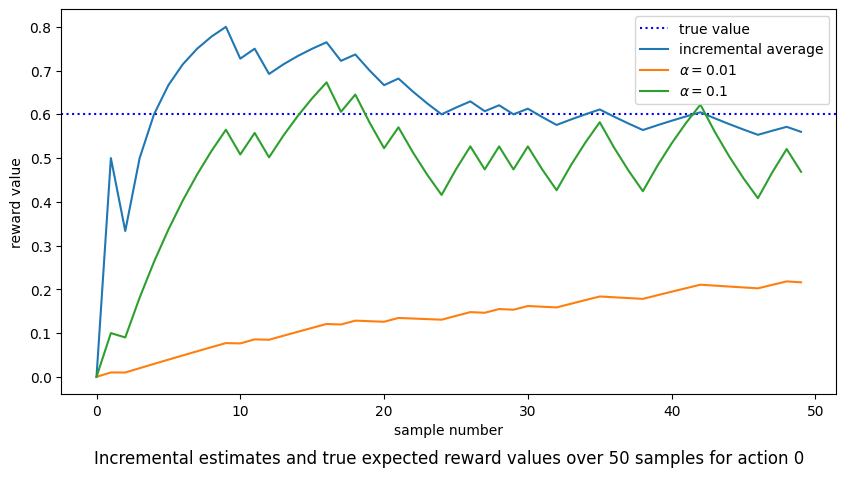

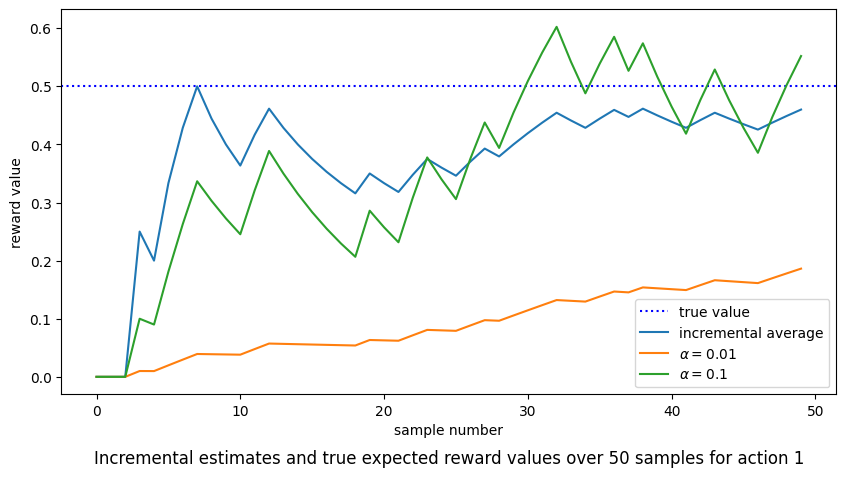

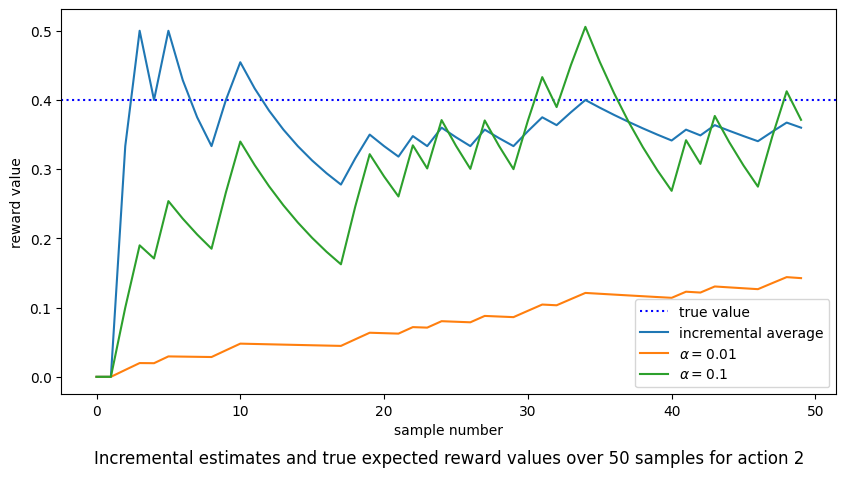

In [6]:
for action in actions:
  fig, ax = plt.subplots()

  # obtain incremental values for averaging, alpha = 0.01, alpha = 0.1
  incr_avgs = list(updateAvg(action_rewards[action]))
  alpha_1_percent = list(update(action_rewards[action], 0.01))
  alpha_10_percent = list(update(action_rewards[action], 0.1))

  true_value = probs_arr[action]

  # draw the true value line
  line_true_val = ax.axhline(y = true_value, color = 'b', linestyle = ':', label = "true value")

  # plot incremental values for averaging, alpha = 0.01, alpha = 0.1
  plt_incr_avgs, = ax.plot(incr_avgs, label = "incremental average")
  plt_alpha_1_percent, = ax.plot(alpha_1_percent, label = r"$\alpha = 0.01$")
  plt_alpha_10_percent, = ax.plot(alpha_10_percent, label = r"$\alpha = 0.1$")

  ax.set_xlabel("sample number")
  ax.set_ylabel("reward value")
  ax.set_title("Incremental estimates and true expected reward values over 50 samples for action %s" %action, y=-0.2)

  # show the legend with the labels of the line
  ax.legend(handles=[line_true_val, plt_incr_avgs, plt_alpha_1_percent, plt_alpha_10_percent])

## Q3 Effect of $α$ on Estimated Q values

In [7]:
num_samples = 100

# arrays of the data generated from 100 runs
incr_avgs_runs = []
alpha_1_percent_runs = []
alpha_10_percent_runs = []

for run in range(100):
  # arrays of data generated from the 3 actions in 1 run
  sample_incr_avgs_by_actions = []
  sample_alpha_1_percent_by_actions = []
  sample_alpha_10_percent_by_actions = []

  for action in actions:
    rewards = []
    for i in range(num_samples):
      rewards.append(three_arm_bernoulli_bandit.sample(action))

    sample_incr_avgs_by_actions.append(list(updateAvg(rewards)))
    sample_alpha_1_percent_by_actions.append(list(update(rewards, 0.01)))
    sample_alpha_10_percent_by_actions.append(list(update(rewards, 0.1)))

  incr_avgs_runs.append(sample_incr_avgs_by_actions)
  alpha_1_percent_runs.append(sample_alpha_1_percent_by_actions)
  alpha_10_percent_runs.append(sample_alpha_10_percent_by_actions)

# convert to np arrays
incr_avgs_runs = np.asarray(incr_avgs_runs)
alpha_1_percent_runs = np.asarray(alpha_1_percent_runs)
alpha_10_percent_runs = np.asarray(alpha_10_percent_runs)

### Graphs

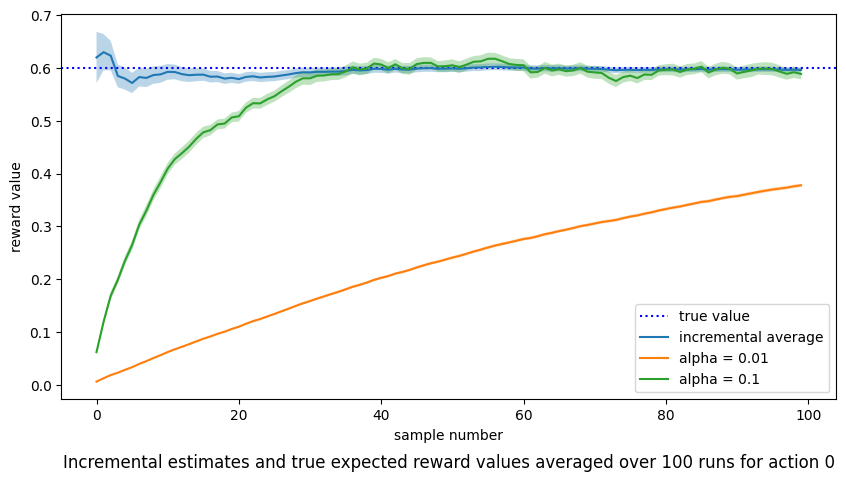

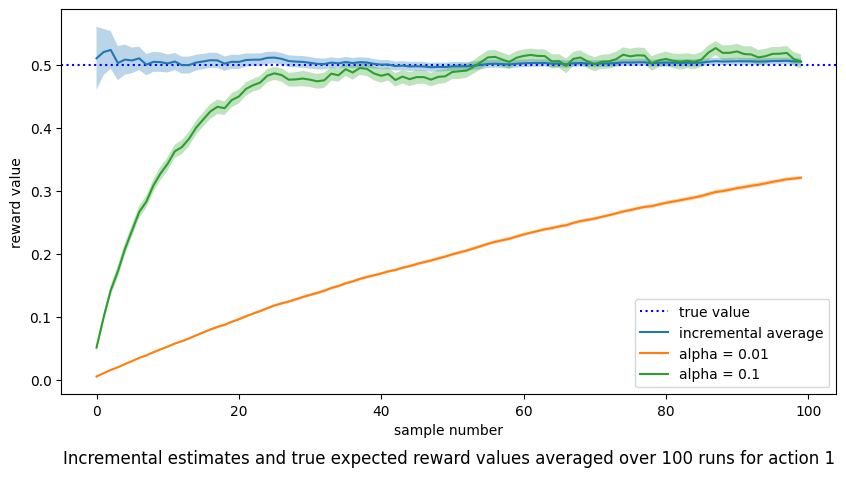

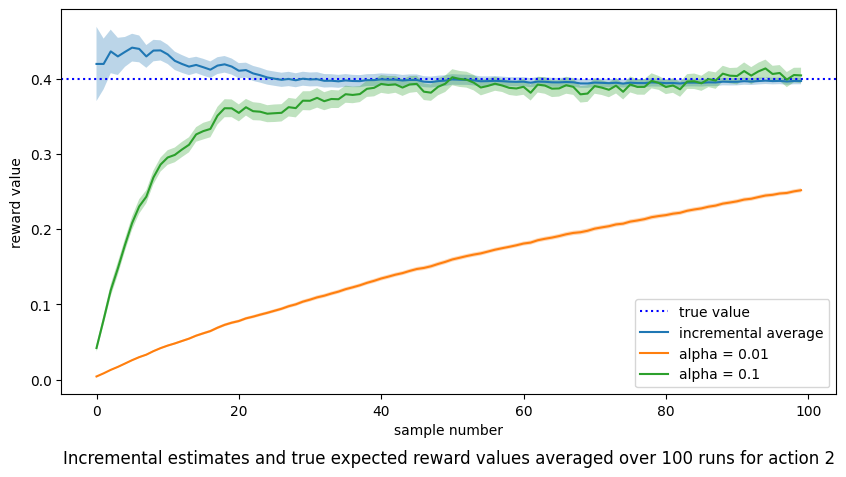

In [8]:
for action in actions:
  fig, ax = plt.subplots()

  # obtain averaged incremental reward values for averaging, alpha = 0.01, alpha = 0.1 over 100 runs
  mean_incr_avgs_by_actions = np.mean(incr_avgs_runs[:,action,:], axis=0)
  mean_alpha_1_percent_by_actions = np.mean(alpha_1_percent_runs[:,action,:], axis=0)
  mean_alpha_10_percent_by_actions = np.mean(alpha_10_percent_runs[:,action,:], axis=0)
  true_value = probs_arr[action]

  # obtain the standard deviation for averaging, alpha = 0.01, alpha = 0.1 over 100 runs
  std_incr_avgs_by_actions = np.std(incr_avgs_runs[:,action,:], axis=0)
  std_alpha_1_percent_by_actions = np.std(alpha_1_percent_runs[:,action,:], axis=0)
  std_alpha_10_percent_by_actions = np.std(alpha_10_percent_runs[:,action,:], axis=0)

  # obtain the standard error for averaging, alpha = 0.01, alpha = 0.1 over 100 runs
  std_err_incr_avgs_by_actions = np.std(incr_avgs_runs[:,action,:], axis=0) / np.sqrt(np.size(incr_avgs_runs[:,action,:], axis=0))
  std_err_alpha_1_percent_by_actions = np.std(alpha_1_percent_runs[:,action,:], axis=0) / np.sqrt(np.size(alpha_1_percent_runs[:,action,:], axis=0))
  std_err_alpha_10_percent_by_actions = np.std(alpha_10_percent_runs[:,action,:], axis=0) / np.sqrt(np.size(alpha_10_percent_runs[:,action,:], axis=0))

  # draw the true value line
  line_true_val = ax.axhline(y = true_value, color = 'b', linestyle = ':', label = "true value")

  # draw the averaged incremental reward values for averaging
  plt_incr_avgs, = ax.plot(mean_incr_avgs_by_actions, label = "incremental average")
  # draw the error bar/area for averaging
  incr_avgs_minus_std_err = mean_incr_avgs_by_actions - std_err_incr_avgs_by_actions
  incr_avgs_plus_std_err = mean_incr_avgs_by_actions + std_err_incr_avgs_by_actions
  ax.fill_between(range(0,100), incr_avgs_minus_std_err, incr_avgs_plus_std_err, alpha=0.3)

  # draw the averaged incremental reward values for alpha = 0.01
  plt_alpha_1_percent, = ax.plot(mean_alpha_1_percent_by_actions, label = "alpha = 0.01")
  # draw the error bar/area for alpha = 0.01
  alpha_1_percent_minus_std_err = mean_alpha_1_percent_by_actions - std_err_alpha_1_percent_by_actions
  alpha_1_percent_plus_std_err = mean_alpha_1_percent_by_actions + std_err_alpha_1_percent_by_actions
  ax.fill_between(range(0,100), alpha_1_percent_minus_std_err, alpha_1_percent_plus_std_err, alpha=0.3)

  # draw the averaged incremental reward values for alpha = 0.1
  plt_alpha_10_percent, = ax.plot(mean_alpha_10_percent_by_actions, label = "alpha = 0.1")
  # draw the error bar/area for alpha = 0.1
  alpha_10_percent_minus_std_err = mean_alpha_10_percent_by_actions - std_err_alpha_10_percent_by_actions
  alpha_10_percent_plus_std_err = mean_alpha_10_percent_by_actions + std_err_alpha_10_percent_by_actions
  ax.fill_between(range(0,100), alpha_10_percent_minus_std_err, alpha_10_percent_plus_std_err, alpha=0.3)

  ax.set_xlabel("sample number")
  ax.set_ylabel("reward value")
  ax.set_title("Incremental estimates and true expected reward values averaged over 100 runs for action %s" %action, y=-0.2)

  ax.legend(handles=[line_true_val, plt_incr_avgs, plt_alpha_1_percent, plt_alpha_10_percent])

### Answers
Over all three arms, the incremental average performs better than the other 2 and the fixed learning rate of alpha = 0.01 performs better than the one with alpha = 0.1. Since the reward values seem to level off at around sample number 40 and above for alpha = 0.01, any range above that is good for optimizing reward value. As for alpha = 0.1, we see that it never levels off and is still increasing, thus, I would suggest increasing the sample number to maybe around 200.

## Q4 Epsilon-greedy

In [9]:
def epsilon_greedy(bandit, epsilon, alpha = None, num_time_step = 1000):
  """Epsilon greedy algorithm for bandit action selection

  Parameters
  ----------
  bandit : bandit class
      A bernoulli bandit attributes num_arms and probs_arr, and method sample
  epsilon: float
      A parameter which determines the probability for a random action to be selected
  alpha: (optional) float
      A parameter which determined the learning rate for averaging. If alpha is none, incremental averaging is used.
      Default is none, corresponding to incremental averaging.

  Returns
  -------
  R_over_t
      a list of instantaneous return over the time steps
  total_R_over_t
      a list of cummulative reward over the time steps
  est_is_best_over_t
      a list of values of 0 and 1 where 1 indicates the estimated best action is the true best action and 0 otherwise for each time step
  l_over_t
      a list of instanteneous regret over the time steps
  total_l_over_t
      a list of cummulative regret over the time steps
  """
  
  num_arms = bandit.num_arms

  Q_arr = np.zeros(num_arms) # array of estimated average reward for each action
  N_arr = np.zeros(num_arms) # array of number of times picked for each action
  total_R = 0
  total_l = 0
  actions = range(num_arms)


  # put bandit probabilities in np arrays 
  arm_probs = np.array([bandit.probs_arr])

  opt_value = max(bandit.probs_arr)               # highest expected reward among all actions
  best_action = np.where(arm_probs == opt_value)[0] # the array of indexes of the actions with highest expected reward

  R_over_t = []
  total_R_over_t = []
  est_is_best_over_t = []
  l_over_t = []
  total_l_over_t = []

  for time_step in range(num_time_step):
    A_star = np.random.choice(np.where(Q_arr == max(Q_arr))[0])     # get index of action with highest estimated average reward with random tie-breaking
    A_random = np.random.choice(actions)
    A = np.random.choice([A_star, A_random], p=[1 - epsilon, epsilon]) # pick a random action with probability epsilon
    curr_R = bandit.sample(A)
    N_arr[A] = N_arr[A] + 1

    if alpha == None:
      # incremental averaging
      Q_arr[A] = Q_arr[A] + (curr_R - Q_arr[A]) / N_arr[A]
    else:
      Q_arr[A] = Q_arr[A] + (curr_R - Q_arr[A]) * alpha

    R_over_t.append(curr_R)

    total_R = total_R + curr_R
    total_R_over_t.append(total_R)

    est_is_best = 1 if A in best_action else 0
    est_is_best_over_t.append(est_is_best)

    l_t = opt_value - bandit.probs_arr[A]
    l_over_t.append(l_t)

    total_l = total_l + l_t
    total_l_over_t.append(total_l)

  return R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t

### Graphs

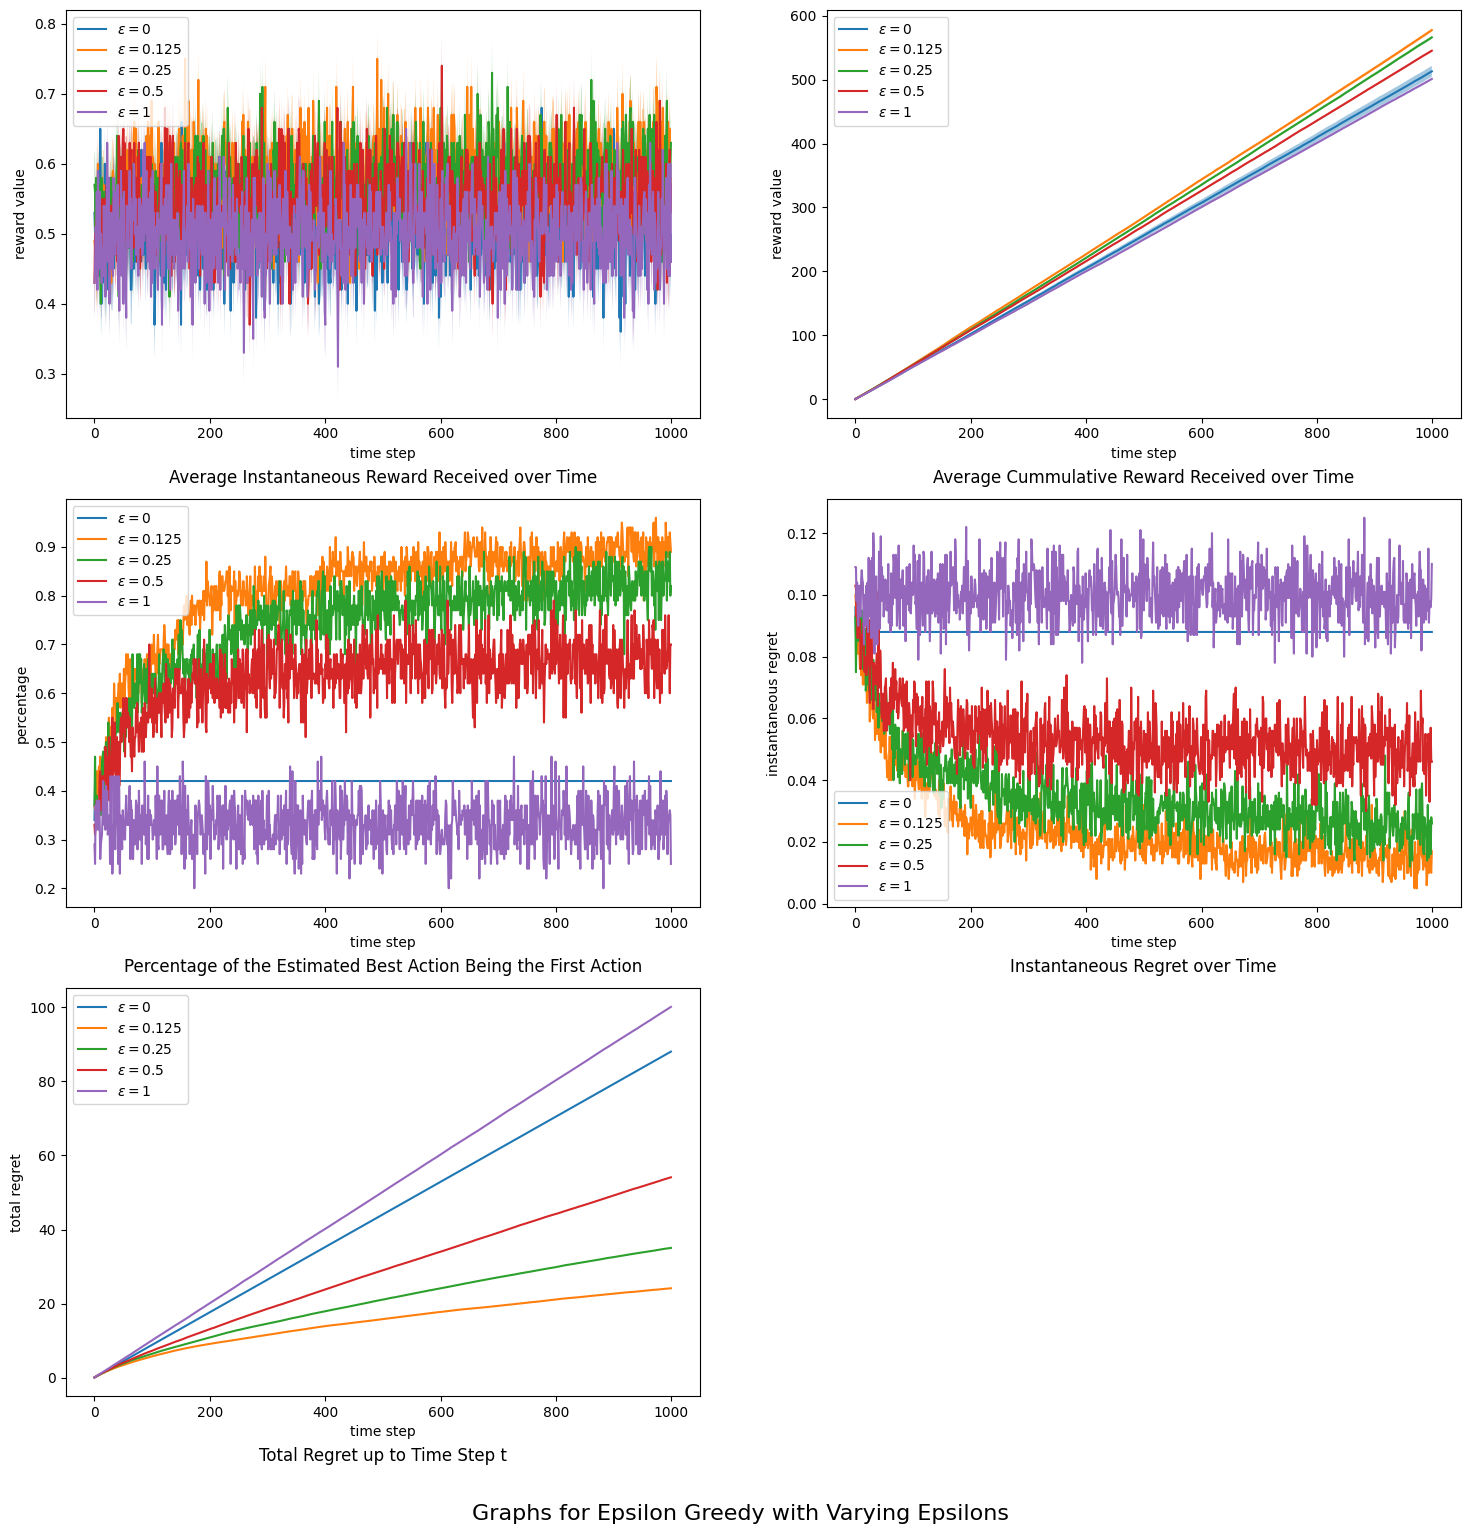

In [10]:
epsilons = [0, 1/8, 1/4, 1/2, 1]

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

for epsilon in epsilons:

  # arrays of the data generated from 100 runs
  R_over_t_runs = []
  total_R_over_t_runs = []
  est_is_best_over_t_runs = []
  l_over_t_runs = []
  total_l_over_t_runs = []

  for run in range(100):
    R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(three_arm_bernoulli_bandit, epsilon)

    R_over_t_runs.append(R_over_t)
    total_R_over_t_runs.append(total_R_over_t)
    est_is_best_over_t_runs.append(est_is_best_over_t)
    l_over_t_runs.append(l_over_t)
    total_l_over_t_runs.append(total_l_over_t)

  R_over_t_runs = np.asarray(R_over_t_runs)
  total_R_over_t_runs = np.asarray(total_R_over_t_runs)
  est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
  l_over_t_runs = np.asarray(l_over_t_runs)
  total_l_over_t_runs = np.asarray(total_l_over_t_runs)

  # plot the mean reward over time

  mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
  std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

  axs[0,0].plot(mean_R_over_t_runs, label = r"$\epsilon = %s$" %epsilon)

  R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
  R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
  axs[0,0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
  # axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

  axs[0,0].legend()
  axs[0,0].set_xlabel("time step")
  axs[0,0].set_ylabel("reward value")
  axs[0,0].set_title("Average Instantaneous Reward Received over Time", y=-0.18)

  # plot the mean cummulative reward over time

  mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
  std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

  axs[0,1].plot(mean_total_R_over_t_runs, label = r"$\epsilon = %s$" %epsilon)

  total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
  total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
  axs[0,1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

  axs[0,1].legend()
  axs[0,1].set_xlabel("time step")
  axs[0,1].set_ylabel("reward value")
  axs[0,1].set_title("Average Cummulative Reward Received over Time", y=-0.18)

  #plot the mean percentage of the estimated best action being the first action

  est_is_best_over_t_runs_avgs = np.mean(est_is_best_over_t_runs, axis=0)
  plt_est_is_best_over_t_runs_avgs, = axs[1,0].plot(est_is_best_over_t_runs_avgs, label = r"$\epsilon = %s$" %epsilon)

  axs[1,0].legend()
  axs[1,0].set_xlabel("time step")
  axs[1,0].set_ylabel("percentage")
  axs[1,0].set_title("Percentage of the Estimated Best Action Being the First Action", y=-0.18)

  #plot the mean instantaneous regret over time

  l_over_t_runs_avgs = np.mean(l_over_t_runs, axis=0)
  axs[1,1].plot(l_over_t_runs_avgs, label = r"$\epsilon = %s$" %epsilon)

  axs[1,1].legend()
  axs[1,1].set_xlabel("time step")
  axs[1,1].set_ylabel("instantaneous regret")
  axs[1,1].set_title("Instantaneous Regret over Time", y=-0.18)

  #plot the total regret over time

  total_l_over_t_runs_avgs = np.mean(total_l_over_t_runs, axis=0)
  axs[2,0].plot(total_l_over_t_runs_avgs, label = r"$\epsilon = %s$" %epsilon)

  axs[2,0].legend()
  axs[2,0].set_xlabel("time step")
  axs[2,0].set_ylabel("total regret")
  axs[2,0].set_title("Total Regret up to Time Step t", y=-0.18)

axs[-1, -1].axis('off')

title = r'Graphs for Epsilon Greedy with Varying Epsilons'
fig.suptitle(title, fontsize=16, y=0.05)

plt.show()

### Answers

The Average Instantaneous Reward over Time Graph (which is pretty crowded and not very clear so we must approximate) seems to show that with epsilon value 0 and 1, we see a small decline with time with them being the worst average rewards at the end among the other epsilons. From then on, from worst to best average reward over time, we get epsilon 0.5, 0.25 and 0.125 (0.25 and 0.125 are pretty close can't say for sure due to unclear graph) which makes sense since with epsilon 1 or 0, we are either exploring all the time or not at all. With the other epsilons, the lower we go, the more we exploit which explains the better average reward over long periods of time the lower the epsilon.

In the Average cumulative reward over time, we can see the same trend as in the first graph but clearer now, with epsilon 0 and 1 being the worst performing over 1000 steps, epsilon 0.5 being middle of the pack and epsilon 0.25 and 0.125 being the better ones.

In the Percentatge of the Estimated Best Action Being the First Action Graph, the trend continues with epsilon 0 and 1 being the lowest percentages, epsilon 0.5 being the middle and epsilon 0.25 and 0.125 being the better percentages. Of note, we see epsilon 0 being a straight line around 0.33 since for each run, we are never exploring and simply picking the first arm  we pull (out of 3). We do this over and over due to it being the best arm after the first pull (since there are no negative rewards, the estimated rewards are strictly increasing).

In the Instantaneous Regret over Time Graph, the trend continues with epsilon 0 and 1 having the greatest regret over time, epsilon 0.5 in the middle and epsilon 0.25 and 0.125 being the lowest regret over time. Of note, we see epsilon 0 being a straight line since for each run, we are never exploring and simply picking the first arm  we pull. Thus, the regret is constant over time for each run.

In the Total Regret up to Time Step t Graph, we can see again the same trend with the total regret of epsilon 1 and 0 rising the fastest, epsilon 0.5 being the middle and epsilon 0.25 and 0.125 being the slowest to rise. Again, this is consistent as regret is higher when you explore more with all else being equal. Thus, the more exploitative epsilons (the lower ones) have smaller regret rises.

## Q5 Hyperparameters for Epsilon-greedy

### Graphs

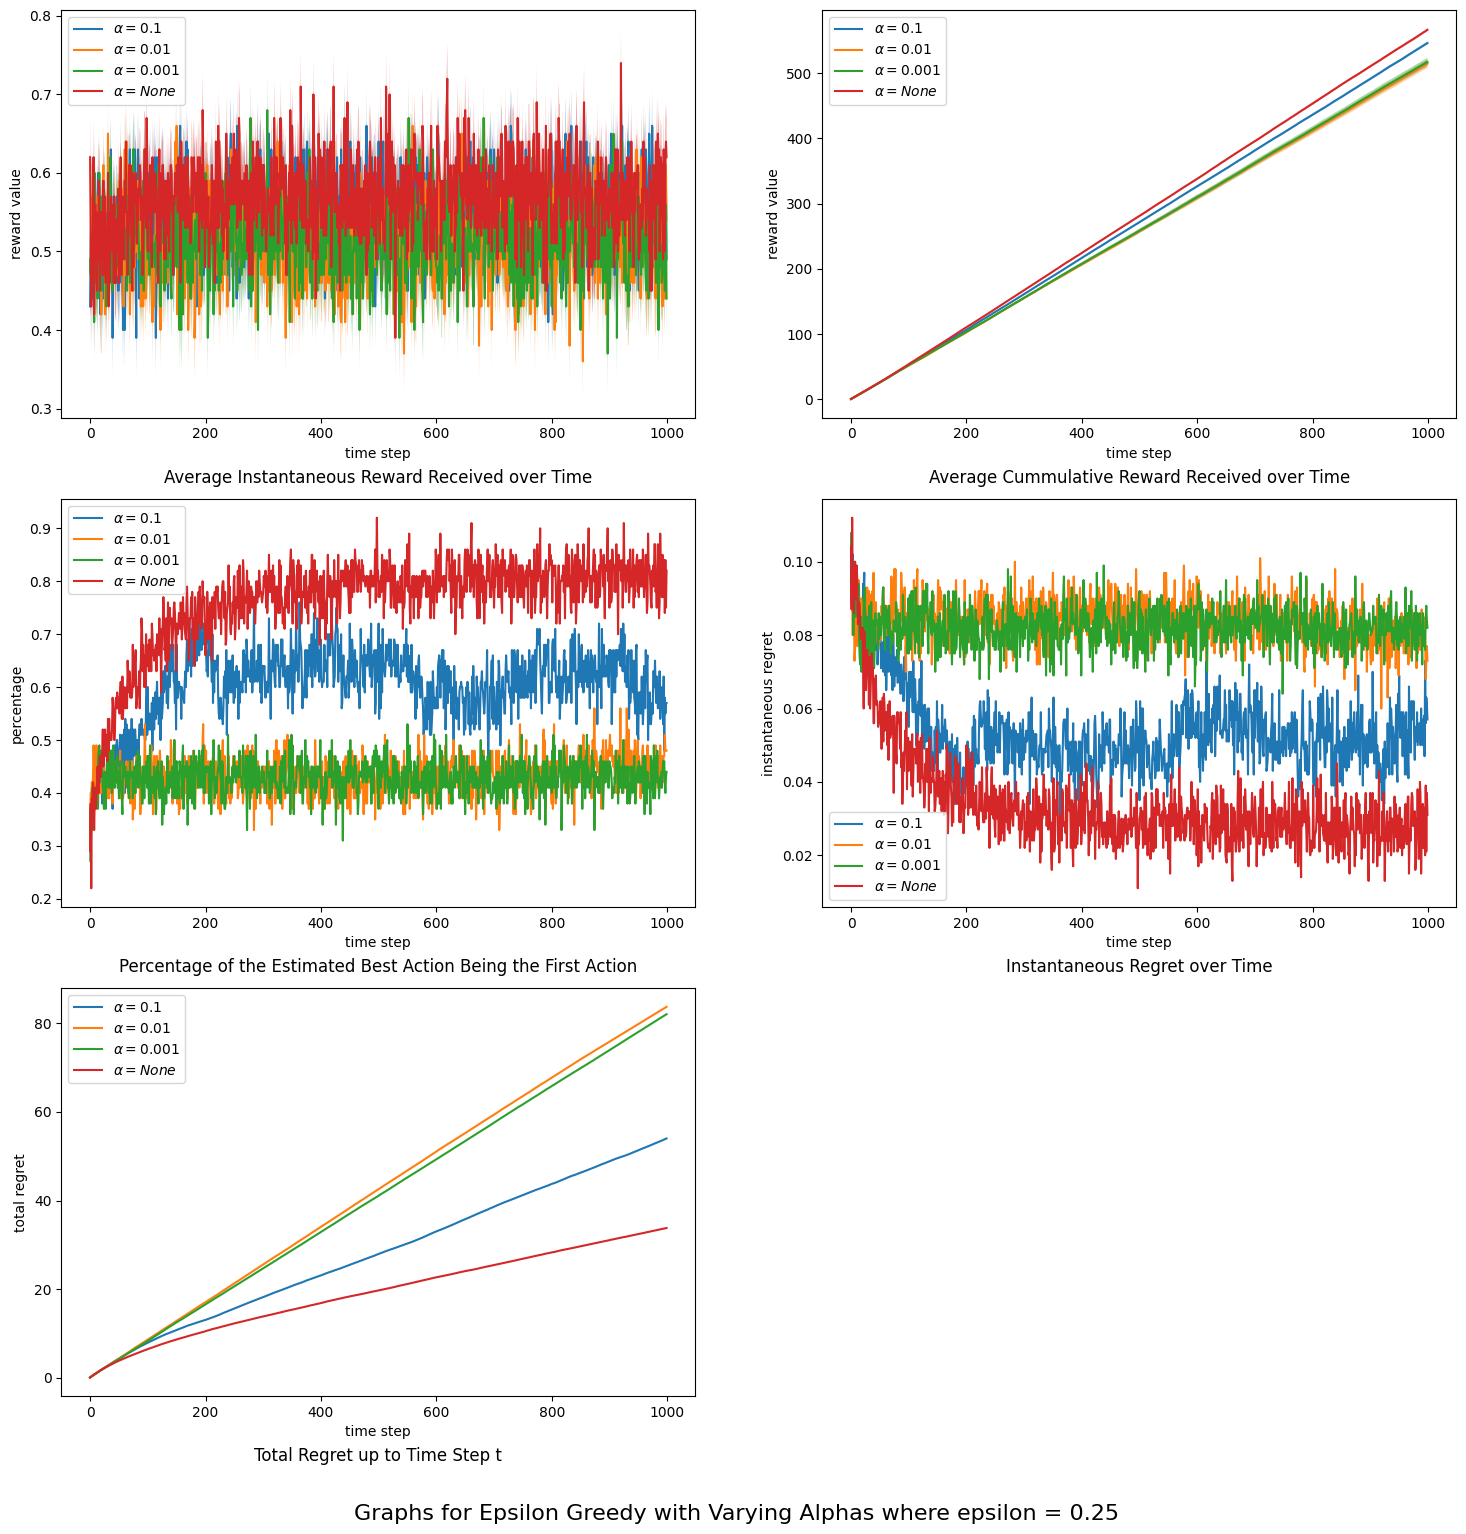

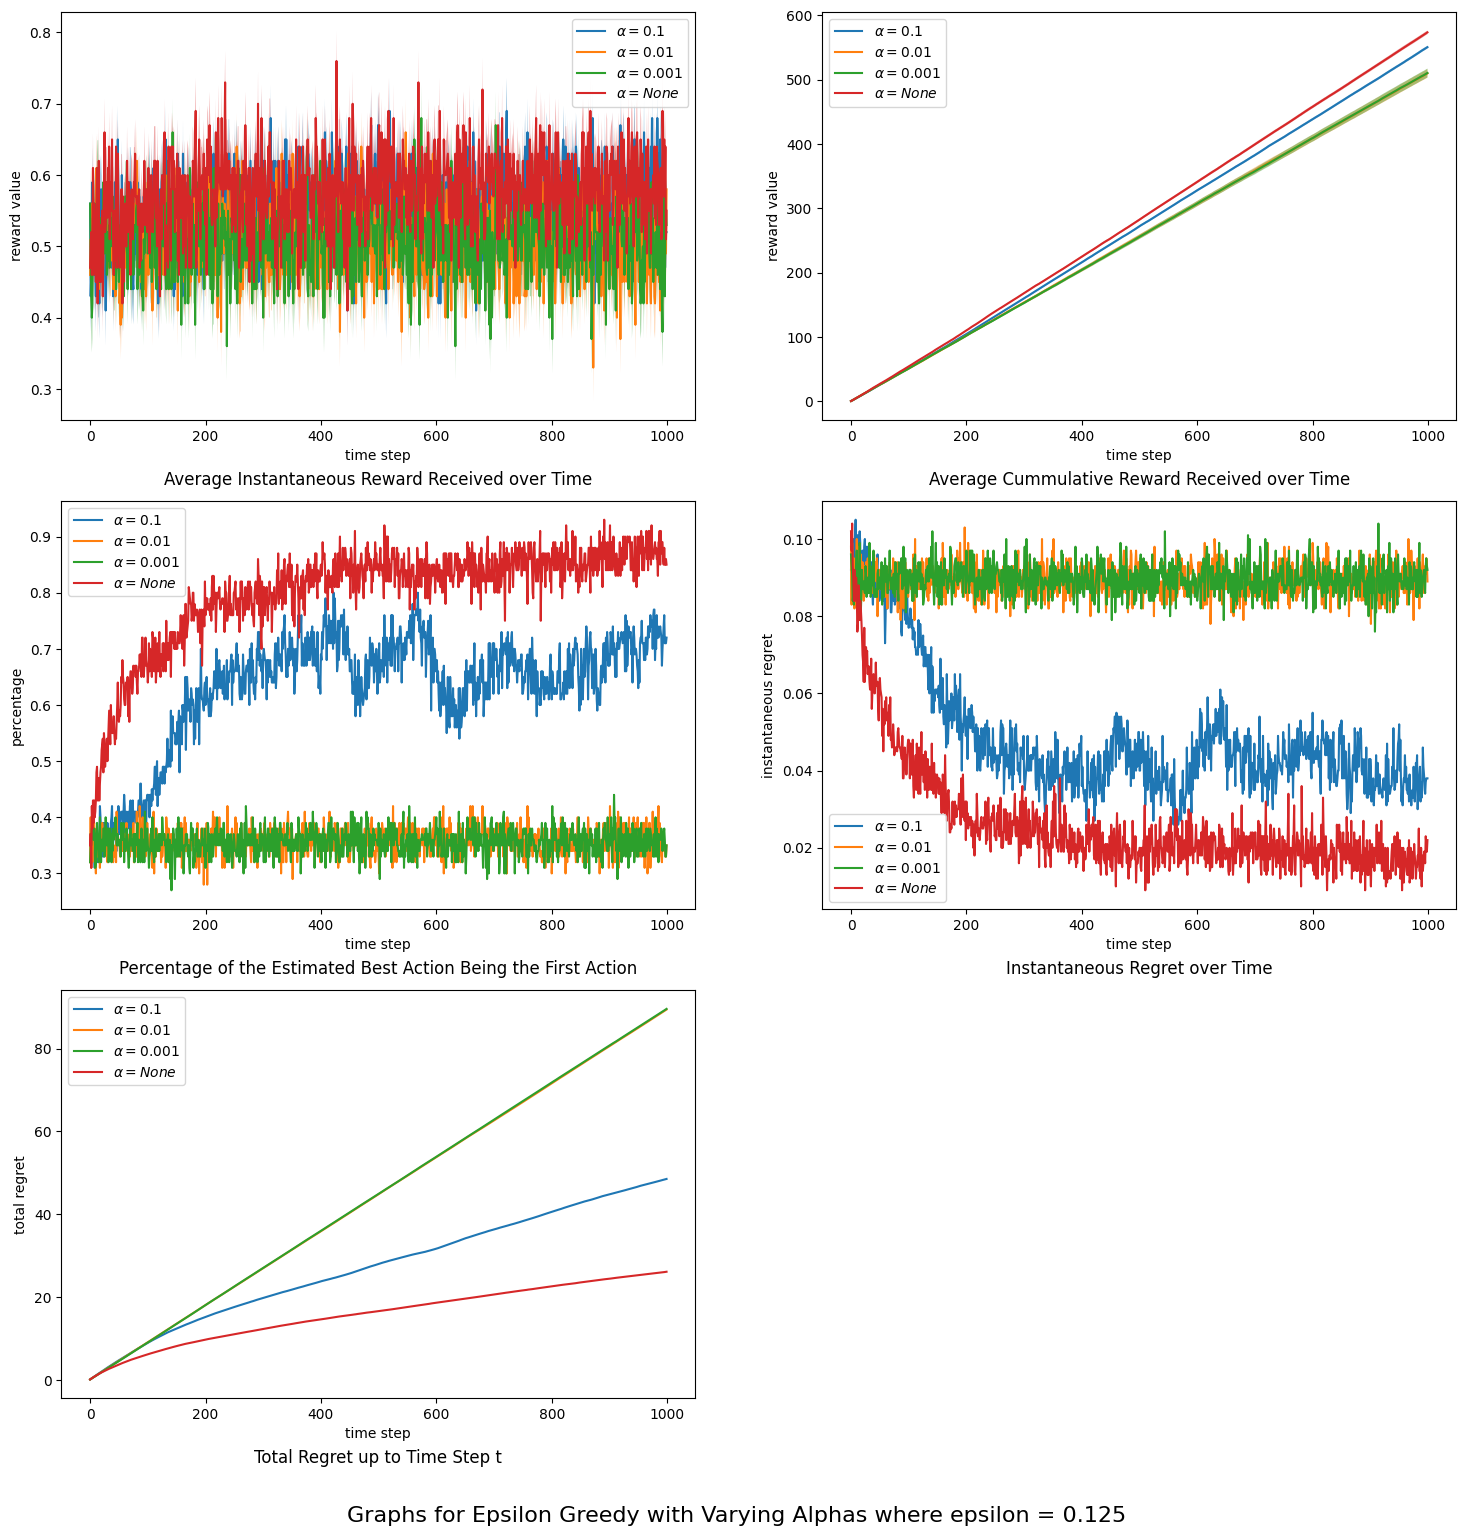

In [11]:
epsilons = [1/4, 1/8]
alphas = [0.1, 0.01, 0.001, None]

for epsilon in epsilons:
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

    for alph in alphas:

        # arrays of the data generated from 100 runs
        R_over_t_runs = []
        total_R_over_t_runs = []
        est_is_best_over_t_runs = []
        l_over_t_runs = []
        total_l_over_t_runs = []

        for run in range(100):
            R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(three_arm_bernoulli_bandit, epsilon, alpha=alph)

            R_over_t_runs.append(R_over_t)
            total_R_over_t_runs.append(total_R_over_t)
            est_is_best_over_t_runs.append(est_is_best_over_t)
            l_over_t_runs.append(l_over_t)
            total_l_over_t_runs.append(total_l_over_t)

        R_over_t_runs = np.asarray(R_over_t_runs)
        total_R_over_t_runs = np.asarray(total_R_over_t_runs)
        est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
        l_over_t_runs = np.asarray(l_over_t_runs)
        total_l_over_t_runs = np.asarray(total_l_over_t_runs)

        # plot the mean reward over time

        mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
        std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

        axs[0,0].plot(mean_R_over_t_runs, label = r"$\alpha = %s$" %alph)

        R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
        R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
        axs[0,0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
        # axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

        axs[0,0].legend()
        axs[0,0].set_xlabel("time step")
        axs[0,0].set_ylabel("reward value")
        axs[0,0].set_title("Average Instantaneous Reward Received over Time", y=-0.18)

        # plot the mean cummulative reward over time

        mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
        std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

        axs[0,1].plot(mean_total_R_over_t_runs, label = r"$\alpha = %s$" %alph)

        total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
        total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
        axs[0,1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

        axs[0,1].legend()
        axs[0,1].set_xlabel("time step")
        axs[0,1].set_ylabel("reward value")
        axs[0,1].set_title("Average Cummulative Reward Received over Time", y=-0.18)

        #plot the mean percentage of the estimated best action being the first action

        est_is_best_over_t_runs_avgs = np.mean(est_is_best_over_t_runs, axis=0)
        plt_est_is_best_over_t_runs_avgs, = axs[1,0].plot(est_is_best_over_t_runs_avgs, label = r"$\alpha = %s$" %alph)

        axs[1,0].legend()
        axs[1,0].set_xlabel("time step")
        axs[1,0].set_ylabel("percentage")
        axs[1,0].set_title("Percentage of the Estimated Best Action Being the First Action", y=-0.18)

        #plot the mean instantaneous regret over time

        l_over_t_runs_avgs = np.mean(l_over_t_runs, axis=0)
        axs[1,1].plot(l_over_t_runs_avgs, label = r"$\alpha = %s$" %alph)

        axs[1,1].legend()
        axs[1,1].set_xlabel("time step")
        axs[1,1].set_ylabel("instantaneous regret")
        axs[1,1].set_title("Instantaneous Regret over Time", y=-0.18)

        #plot the total regret over time

        total_l_over_t_runs_avgs = np.mean(total_l_over_t_runs, axis=0)
        axs[2,0].plot(total_l_over_t_runs_avgs, label = r"$\alpha = %s$" %alph)

        axs[2,0].legend()
        axs[2,0].set_xlabel("time step")
        axs[2,0].set_ylabel("total regret")
        axs[2,0].set_title("Total Regret up to Time Step t", y=-0.18)

    axs[-1, -1].axis('off')

    title = r'Graphs for Epsilon Greedy with Varying Alphas where epsilon = %s' %epsilon
    fig.suptitle(title, fontsize=16, y=0.05)

    plt.show()

### Answers

For both epsilon 0.25 and 0.125, we see that the averaging update works better than the fixed learning rate methods with the smaller aplha's being significantly worse and the alpha = 0.1 being close but still clearly worse than the averaging update. This makes sense since we are in a stationary problem case where a learning step/ recency bias is not needed.

## Q6 UCB

In [12]:
def UCB(bandit, c = 2, alpha = None, num_time_step = 1000):
  """Upper confidence bound algorithm for bandit action selection

  Parameters
  ----------
  bandit : bandit class
      A bernoulli bandit attributes num_arms and probs_arr, and method sample
  c: int
      A parameter which determines the degree of exploration, the higher the c the higher the tendency for
      the algorithm to explore potentially suboptimal actionss
  alpha: (optional) float
      A parameter which determined the learning rate for averaging. If alpha is none, incremental averaging is used.
      Default is none, corresponding to incremental averaging.

  Returns
  -------
  R_over_t
      a list of instantaneous return over the time steps
  total_R_over_t
      a list of cummulative reward over the time steps
  est_is_best_over_t
      a list of values of 0 and 1 where 1 indicates the estimated best action is the true best action and 0 otherwise for each time step
  l_over_t
      a list of instanteneous regret over the time steps
  total_l_over_t
      a list of cummulative regret over the time steps
  """

  num_arms = bandit.num_arms
    
  Q_arr = np.zeros(num_arms) # array of estimated average reward for each action
  N_arr = np.ones(num_arms) # array of number of times picked for each action
  total_R = 0
  total_l = 0
  actions = range(num_arms)

  # put bandit probabilities in np arrays
  arm_probs = np.array([bandit.probs_arr])

  opt_value = max(bandit.probs_arr)               # highest expected reward among all actions
  best_action = np.where(arm_probs == opt_value)[0] # the array of indexes of the actions with highest expected reward

  R_over_t = []
  total_R_over_t = []
  est_is_best_over_t = []
  l_over_t = []
  total_l_over_t = []

  for time_step in range(1,num_time_step+1):
    
    upper_bounds = np.zeros(num_arms)  # array of the upper bound estimates for each action
    for estimate in range(len(Q_arr)):
      upper_bounds[estimate] = Q_arr[estimate] + c * math.sqrt(math.log(time_step) / N_arr[estimate])

    A = np.random.choice(np.where(upper_bounds == max(upper_bounds))[0])  # get index of action with highest estimated upper bound with random tie-breaking
    curr_R = bandit.sample(A)
    N_arr[A] = N_arr[A] + 1

    if alpha == None:
      # incremental averaging
      Q_arr[A] = Q_arr[A] + (curr_R - Q_arr[A]) / N_arr[A]
    else:
      Q_arr[A] = Q_arr[A] + (curr_R - Q_arr[A]) * alpha

    R_over_t.append(curr_R)

    total_R = total_R + curr_R
    total_R_over_t.append(total_R)

    est_is_best = 1 if A in best_action else 0
    est_is_best_over_t.append(est_is_best)

    l_t = opt_value - bandit.probs_arr[A]
    l_over_t.append(l_t)

    total_l = total_l + l_t
    total_l_over_t.append(total_l)

  return R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t

### Graphs

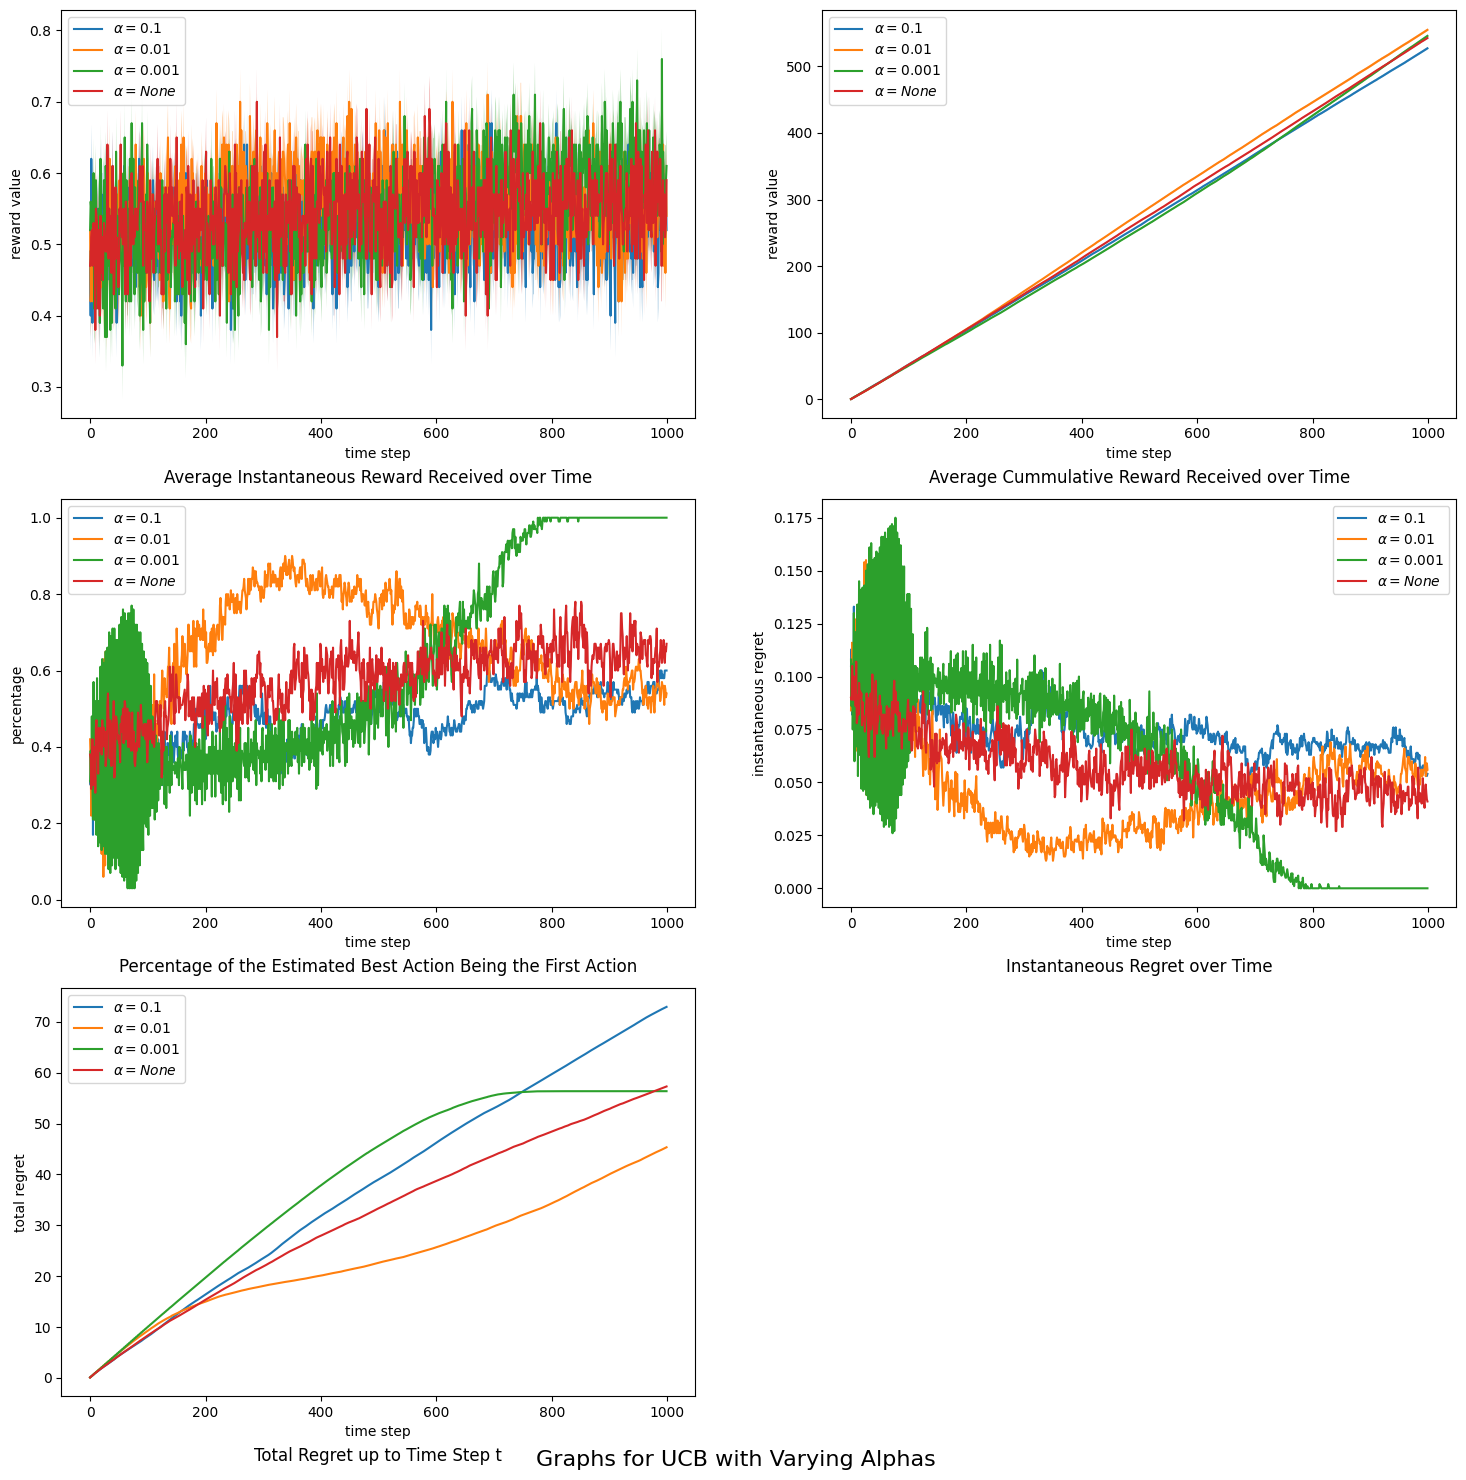

In [13]:
alphas = [0.1, 0.01, 0.001, None]


fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

for alph in alphas:

    # arrays of the data generated from 100 runs
    R_over_t_runs = []
    total_R_over_t_runs = []
    est_is_best_over_t_runs = []
    l_over_t_runs = []
    total_l_over_t_runs = []

    for run in range(100):
        R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = UCB(three_arm_bernoulli_bandit, alpha=alph)

        R_over_t_runs.append(R_over_t)
        total_R_over_t_runs.append(total_R_over_t)
        est_is_best_over_t_runs.append(est_is_best_over_t)
        l_over_t_runs.append(l_over_t)
        total_l_over_t_runs.append(total_l_over_t)

    R_over_t_runs = np.asarray(R_over_t_runs)
    total_R_over_t_runs = np.asarray(total_R_over_t_runs)
    est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
    l_over_t_runs = np.asarray(l_over_t_runs)
    total_l_over_t_runs = np.asarray(total_l_over_t_runs)

    # plot the mean reward over time

    mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
    std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

    axs[0,0].plot(mean_R_over_t_runs, label = r"$\alpha = %s$" %alph)

    R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
    R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
    axs[0,0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
    # axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

    axs[0,0].legend()
    axs[0,0].set_xlabel("time step")
    axs[0,0].set_ylabel("reward value")
    axs[0,0].set_title("Average Instantaneous Reward Received over Time", y=-0.18)

    # plot the mean cummulative reward over time

    mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
    std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

    axs[0,1].plot(mean_total_R_over_t_runs, label = r"$\alpha = %s$" %alph)

    total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
    total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
    axs[0,1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

    axs[0,1].legend()
    axs[0,1].set_xlabel("time step")
    axs[0,1].set_ylabel("reward value")
    axs[0,1].set_title("Average Cummulative Reward Received over Time", y=-0.18)

    #plot the mean percentage of the estimated best action being the first action

    est_is_best_over_t_runs_avgs = np.mean(est_is_best_over_t_runs, axis=0)
    plt_est_is_best_over_t_runs_avgs, = axs[1,0].plot(est_is_best_over_t_runs_avgs, label = r"$\alpha = %s$" %alph)

    axs[1,0].legend()
    axs[1,0].set_xlabel("time step")
    axs[1,0].set_ylabel("percentage")
    axs[1,0].set_title("Percentage of the Estimated Best Action Being the First Action", y=-0.18)

    #plot the mean instantaneous regret over time

    l_over_t_runs_avgs = np.mean(l_over_t_runs, axis=0)
    axs[1,1].plot(l_over_t_runs_avgs, label = r"$\alpha = %s$" %alph)

    axs[1,1].legend()
    axs[1,1].set_xlabel("time step")
    axs[1,1].set_ylabel("instantaneous regret")
    axs[1,1].set_title("Instantaneous Regret over Time", y=-0.18)

    #plot the total regret over time

    total_l_over_t_runs_avgs = np.mean(total_l_over_t_runs, axis=0)
    axs[2,0].plot(total_l_over_t_runs_avgs, label = r"$\alpha = %s$" %alph)

    axs[2,0].legend()
    axs[2,0].set_xlabel("time step")
    axs[2,0].set_ylabel("total regret")
    axs[2,0].set_title("Total Regret up to Time Step t", y=-0.18)

axs[-1, -1].axis('off')

title = r'Graphs for UCB with Varying Alphas'
fig.suptitle(title, fontsize=16, y=0.08)

plt.show()

### Answers

For the average instantaneous and cummulative reward received over time, while alpha = 0.01 has a slight edge over the others, they are all very close in performance.

In the Percentage of the Estimated Best Action Being the First Action graph, all but the alpha = 0.001 have similar end result with alpha = 0.01 having the higher peak of them but coming back down to the same level at time step 1000. Alpha = 0.001 has a huge amount of variance at the first 50 ish timesteps as well as the best end result plateauing at 1 at time step 1000 and staying constant. Thus, alpha = 0.001 is the best performing of them.

In the Instantaneous Regret over Time graph, we get the same trends as in the one above, with alpha = 0.001 being the clear best and a big amount of variance in the first 50 time steps as well as reaching and plateauing at instantaneous regrets of 0. All the other values of alpha perform similarily with alpha = 0.01 having the lowest instaneous regret but comming back up to the level of the others.

In the Total Regret up to Time Step graph, we can see that all values of alpha start at the same increasing rate of regret for the first 200 time steps with the alpha = 0.001 being slightly better. The main difference is at time step around 700 where alpha = 0.001 plateaus heavily to become practically constant.

## Q7 Thompson Sampling

In [14]:
def Thompson_sampling(bandit, num_time_step = 1000):
  """Thompson sampling algorithm for bandit action selection

  Parameters
  ----------
  bandit : bandit class
      A bernoulli bandit attributes num_arms and probs_arr, and method sample

  Returns
  -------
  R_over_t
      a list of instantaneous return over the time steps
  total_R_over_t
      a list of cummulative reward over the time steps
  est_is_best_over_t
      a list of values of 0 and 1 where 1 indicates the estimated best action is the true best action and 0 otherwise for each time step
  l_over_t
      a list of instanteneous regret over the time steps
  total_l_over_t
      a list of cummulative regret over the time steps
  """

  num_arms = bandit.num_arms
  alphas = np.ones(num_arms) # array of alpha values for each action
  betas = np.ones(num_arms) # array of beta values for each action
  N_arr = np.ones(num_arms) # array of number of times picked for each action
    
  total_R = 0
  total_l = 0
  actions = range(num_arms)

  # put bandit probabilities in np arrays
  arm_probs = np.array([bandit.probs_arr])

  opt_value = max(bandit.probs_arr)               # highest expected reward among all actions
  best_action = np.where(arm_probs == opt_value)[0] # the array of indexes of the actions with highest expected reward

  R_over_t = []
  total_R_over_t = []
  est_is_best_over_t = []
  l_over_t = []
  total_l_over_t = []

  for time_step in range(num_time_step):
    
    sampled_values = np.zeros(num_arms)  # array of the samples from the beta distributions for each action
    for i in range(num_arms):
      sampled_values[i] = np.random.beta(alphas[i], betas[i])


    A = np.random.choice(np.where(sampled_values == max(sampled_values))[0])  # get index of action with highest sample from the beta distributions with random tie-breaking
    curr_R = bandit.sample(A)
    N_arr[A] = N_arr[A] + 1

    #updating the alpha and beta in light of the reward
    if curr_R == 1:
      alphas[A] = alphas[A] + 1
    else:
      betas[A] = betas[A] + 1

    R_over_t.append(curr_R)

    total_R = total_R + curr_R
    total_R_over_t.append(total_R)

    est_is_best = 1 if A in best_action else 0
    est_is_best_over_t.append(est_is_best)

    l_t = opt_value - bandit.probs_arr[A]
    l_over_t.append(l_t)

    total_l = total_l + l_t
    total_l_over_t.append(total_l)

  return R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t

### Graphs

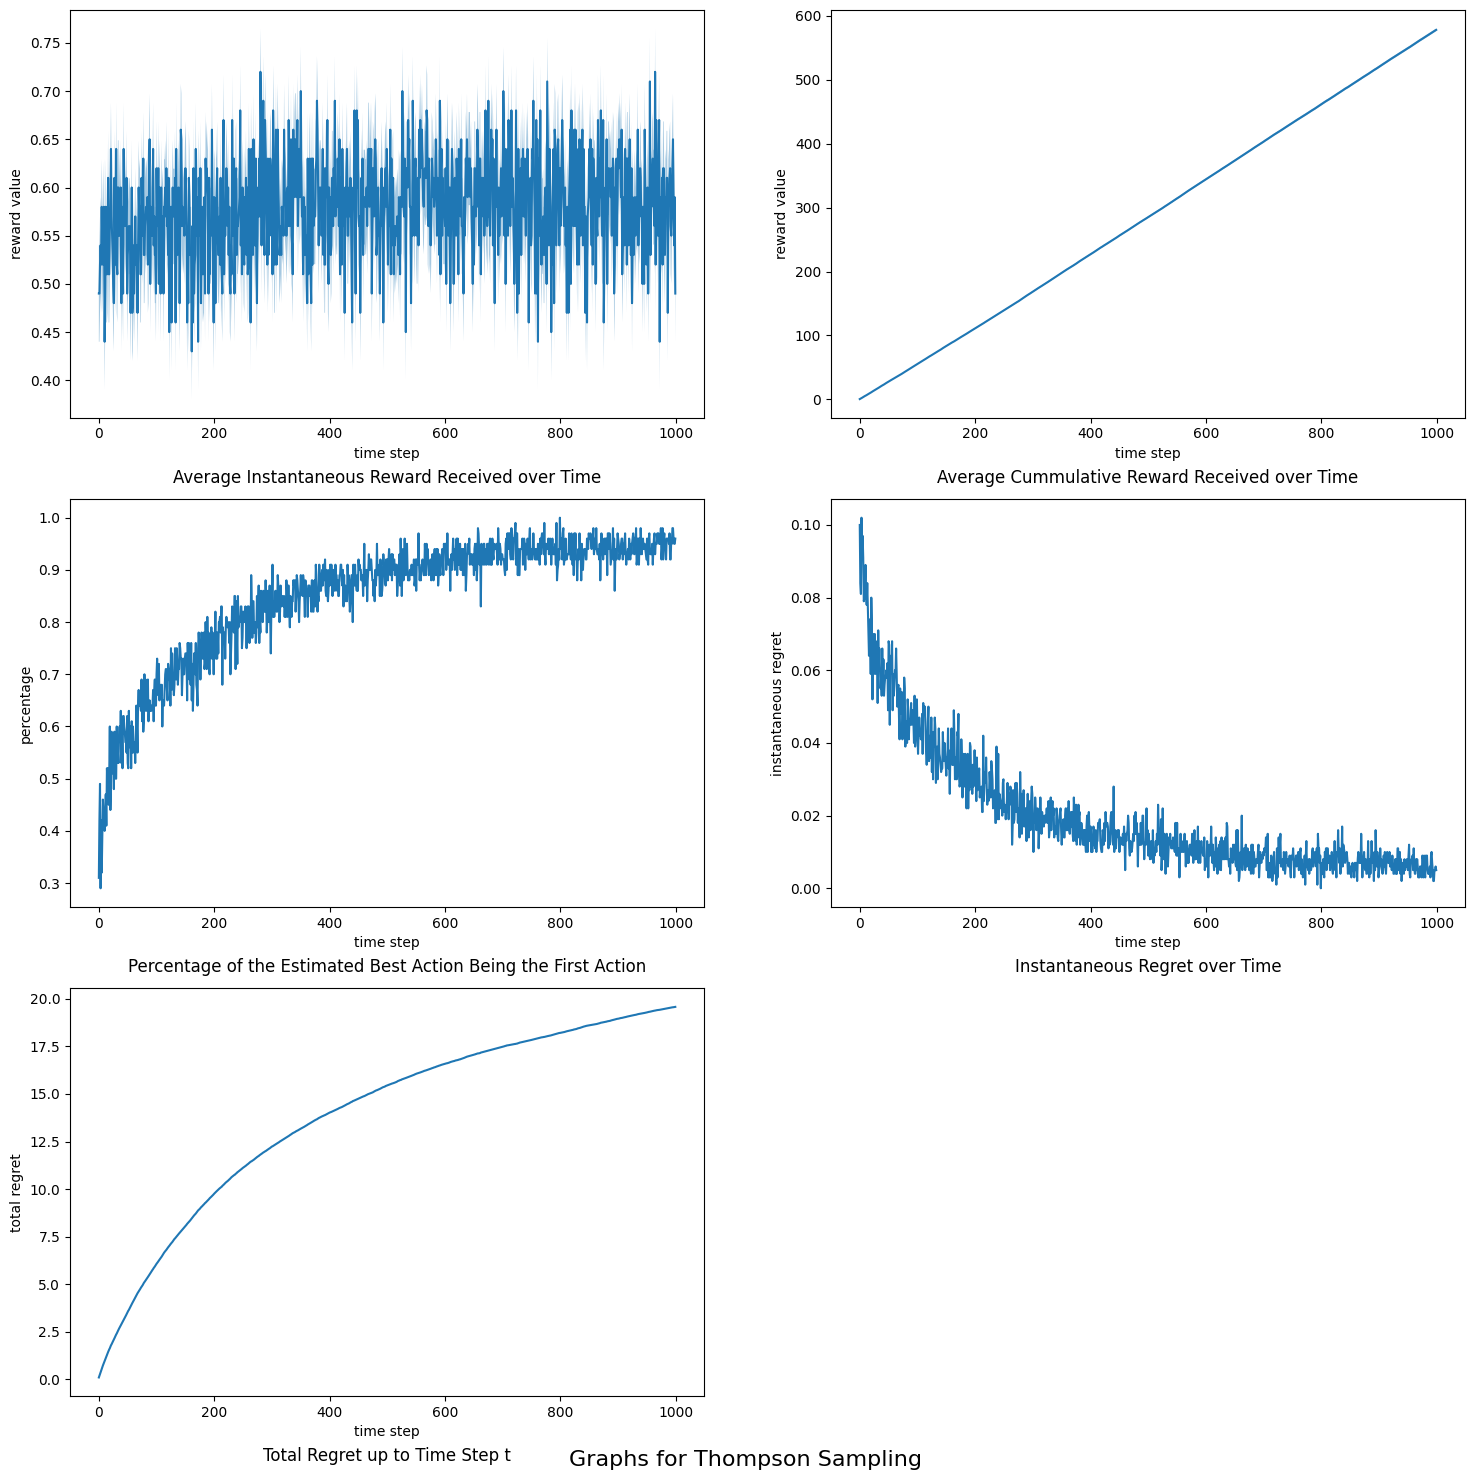

In [15]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

# arrays of the data generated from 100 runs
R_over_t_runs = []
total_R_over_t_runs = []
est_is_best_over_t_runs = []
l_over_t_runs = []
total_l_over_t_runs = []

for run in range(100):
    R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = Thompson_sampling(three_arm_bernoulli_bandit)

    R_over_t_runs.append(R_over_t)
    total_R_over_t_runs.append(total_R_over_t)
    est_is_best_over_t_runs.append(est_is_best_over_t)
    l_over_t_runs.append(l_over_t)
    total_l_over_t_runs.append(total_l_over_t)

R_over_t_runs = np.asarray(R_over_t_runs)
total_R_over_t_runs = np.asarray(total_R_over_t_runs)
est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
l_over_t_runs = np.asarray(l_over_t_runs)
total_l_over_t_runs = np.asarray(total_l_over_t_runs)

# plot the mean reward over time

mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

axs[0,0].plot(mean_R_over_t_runs)

R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
axs[0,0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
# axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

axs[0,0].set_xlabel("time step")
axs[0,0].set_ylabel("reward value")
axs[0,0].set_title("Average Instantaneous Reward Received over Time", y=-0.18)

# plot the mean cummulative reward over time

mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

axs[0,1].plot(mean_total_R_over_t_runs)

total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
axs[0,1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

axs[0,1].set_xlabel("time step")
axs[0,1].set_ylabel("reward value")
axs[0,1].set_title("Average Cummulative Reward Received over Time", y=-0.18)

#plot the mean percentage of the estimated best action being the first action

est_is_best_over_t_runs_avgs = np.mean(est_is_best_over_t_runs, axis=0)
plt_est_is_best_over_t_runs_avgs, = axs[1,0].plot(est_is_best_over_t_runs_avgs)


axs[1,0].set_xlabel("time step")
axs[1,0].set_ylabel("percentage")
axs[1,0].set_title("Percentage of the Estimated Best Action Being the First Action", y=-0.18)

#plot the mean instantaneous regret over time

l_over_t_runs_avgs = np.mean(l_over_t_runs, axis=0)
axs[1,1].plot(l_over_t_runs_avgs)

axs[1,1].set_xlabel("time step")
axs[1,1].set_ylabel("instantaneous regret")
axs[1,1].set_title("Instantaneous Regret over Time", y=-0.18)

#plot the total regret over time

total_l_over_t_runs_avgs = np.mean(total_l_over_t_runs, axis=0)
axs[2,0].plot(total_l_over_t_runs_avgs)

axs[2,0].set_xlabel("time step")
axs[2,0].set_ylabel("total regret")
axs[2,0].set_title("Total Regret up to Time Step t", y=-0.18)

axs[-1, -1].axis('off')

title = r'Graphs for Thompson Sampling'
fig.suptitle(title, fontsize=16, y=0.08)

plt.show()

### Answers

The reward received over time graphs show significant improvement over time, more than some of the other ones like UCB and epsilon greedy. 

The percentage of the estimated best action graph shows a that we improve a lot over time as we get more data ending in the high 90% at the end of 1000 time steps.

The Instantaneous regret graph also shows the same thing with high regret at the start which goes down significantly at the end of 1000 time steps to almost 0.

The total regret graph also shows the trend of getting significantly better as we get more data with the rate of increase of regret slowing down.

## Q8 Comparison of Algorithms

### Graphs

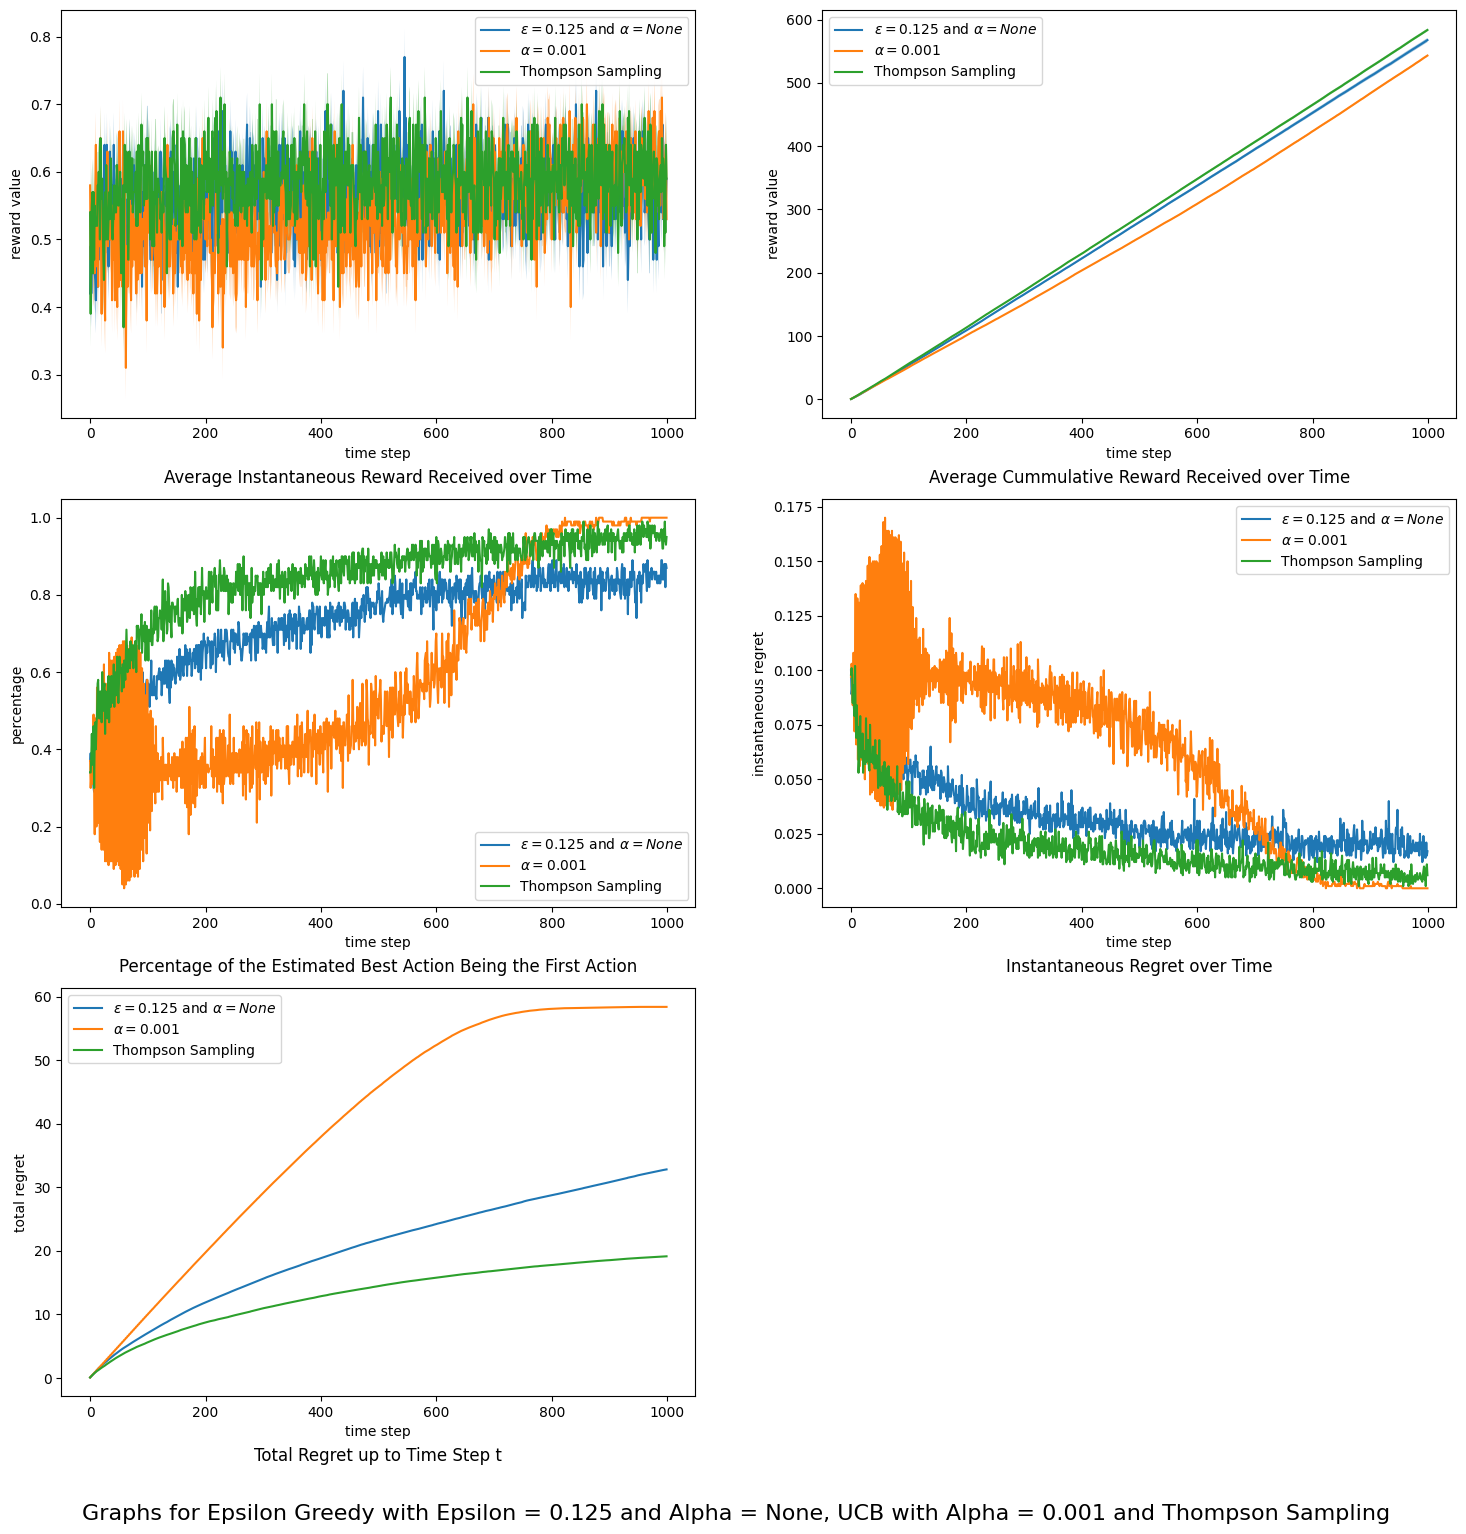

In [16]:
epsilons = 1/8
alphas = 0.001
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))


for j in range(3):

  # arrays of the data generated from 100 runs
  R_over_t_runs = []
  total_R_over_t_runs = []
  est_is_best_over_t_runs = []
  l_over_t_runs = []
  total_l_over_t_runs = []

  for run in range(100):
    if(j == 0):
        R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(three_arm_bernoulli_bandit, epsilons)
    elif(j == 1):
        R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = UCB(three_arm_bernoulli_bandit, alpha=alphas)
    else:
       R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = Thompson_sampling(three_arm_bernoulli_bandit)

    R_over_t_runs.append(R_over_t)
    total_R_over_t_runs.append(total_R_over_t)
    est_is_best_over_t_runs.append(est_is_best_over_t)
    l_over_t_runs.append(l_over_t)
    total_l_over_t_runs.append(total_l_over_t)

  R_over_t_runs = np.asarray(R_over_t_runs)
  total_R_over_t_runs = np.asarray(total_R_over_t_runs)
  est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
  l_over_t_runs = np.asarray(l_over_t_runs)
  total_l_over_t_runs = np.asarray(total_l_over_t_runs)

  # plot the mean reward over time

  mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
  std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

  if(j == 0):
        axs[0,0].plot(mean_R_over_t_runs, label = r"$\epsilon = %s$ and $\alpha = None$" %epsilons)
  elif(j == 1):
        axs[0,0].plot(mean_R_over_t_runs, label = r"$\alpha = %s$" %alphas)
  else:
      axs[0,0].plot(mean_R_over_t_runs, label = r"Thompson Sampling")

  R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
  R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
  axs[0,0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
  # axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

  axs[0,0].legend()
  axs[0,0].set_xlabel("time step")
  axs[0,0].set_ylabel("reward value")
  axs[0,0].set_title("Average Instantaneous Reward Received over Time", y=-0.18)

  # plot the mean cummulative reward over time

  mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
  std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

  if(j == 0):
        axs[0,1].plot(mean_total_R_over_t_runs, label = r"$\epsilon = %s$ and $\alpha = None$" %epsilons)
  elif(j == 1):
        axs[0,1].plot(mean_total_R_over_t_runs, label = r"$\alpha = %s$" %alphas)
  else:
      axs[0,1].plot(mean_total_R_over_t_runs, label = r"Thompson Sampling")

  total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
  total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
  axs[0,1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

  axs[0,1].legend()
  axs[0,1].set_xlabel("time step")
  axs[0,1].set_ylabel("reward value")
  axs[0,1].set_title("Average Cummulative Reward Received over Time", y=-0.18)

  #plot the mean percentage of the estimated best action being the first action

  est_is_best_over_t_runs_avgs = np.mean(est_is_best_over_t_runs, axis=0)
  if(j == 0):
        plt_est_is_best_over_t_runs_avgs, = axs[1,0].plot(est_is_best_over_t_runs_avgs, label = r"$\epsilon = %s$ and $\alpha = None$" %epsilons)
  elif(j == 1):
        plt_est_is_best_over_t_runs_avgs, = axs[1,0].plot(est_is_best_over_t_runs_avgs, label = r"$\alpha = %s$" %alphas)
  else:
      plt_est_is_best_over_t_runs_avgs, = axs[1,0].plot(est_is_best_over_t_runs_avgs, label = r"Thompson Sampling")

  axs[1,0].legend()
  axs[1,0].set_xlabel("time step")
  axs[1,0].set_ylabel("percentage")
  axs[1,0].set_title("Percentage of the Estimated Best Action Being the First Action", y=-0.18)

  #plot the mean instantaneous regret over time

  l_over_t_runs_avgs = np.mean(l_over_t_runs, axis=0)
  if(j == 0):
        axs[1,1].plot(l_over_t_runs_avgs, label = r"$\epsilon = %s$ and $\alpha = None$" %epsilons)
  elif(j == 1):
        axs[1,1].plot(l_over_t_runs_avgs, label = r"$\alpha = %s$" %alphas)
  else:
      axs[1,1].plot(l_over_t_runs_avgs, label = r"Thompson Sampling")

  axs[1,1].legend()
  axs[1,1].set_xlabel("time step")
  axs[1,1].set_ylabel("instantaneous regret")
  axs[1,1].set_title("Instantaneous Regret over Time", y=-0.18)

  #plot the total regret over time

  total_l_over_t_runs_avgs = np.mean(total_l_over_t_runs, axis=0)
  if(j == 0):
        axs[2,0].plot(total_l_over_t_runs_avgs, label = r"$\epsilon = %s$ and $\alpha = None$" %epsilons)
  elif(j == 1):
        axs[2,0].plot(total_l_over_t_runs_avgs, label = r"$\alpha = %s$" %alphas)
  else:
      axs[2,0].plot(total_l_over_t_runs_avgs, label = r"Thompson Sampling")

  axs[2,0].legend()
  axs[2,0].set_xlabel("time step")
  axs[2,0].set_ylabel("total regret")
  axs[2,0].set_title("Total Regret up to Time Step t", y=-0.18)

axs[-1, -1].axis('off')

title = r'Graphs for Epsilon Greedy with Epsilon = 0.125 and Alpha = None, UCB with Alpha = 0.001 and Thompson Sampling'
fig.suptitle(title, fontsize=16, y=0.05)

plt.show()

### Answers

For the epsilon greedy, the best alpha = None was because its performed the best on all graphs independantly of epsilon values. Then, the epsilon value of 0.125 was chosen for its better performance than the epsilon = 0.25 (even though its a small difference).

For the UCB, the best alpha = 0.001 was chosen for its asymptotic behavior where its performance is the best out of all 3 algorithms at time step 1000 on all 5 graphs.

When plotted together, we can see that Thompson Sampling and Epsilon Greedy with Epsilon = 0.125 and Alpha = None have similar performances with Thompson Sampling being better. We can also see the difference in variance for UCB compared to the other 2. The total regret and instantaneous regret over time of UCB is much higher but with better behavior in the later time steps suggesting that this approach is better on the long runs/with large amount of data.

## Q9 Non-stationary Environment

In [17]:
def epsilon_greedy_non_stationary(bandit1, bandit2, epsilon, alpha = None, num_time_step = 1000):
  """Epsilon greedy algorithm for bandit action selection

  Parameters
  ----------
  bandit : bandit class
      A bernoulli bandit attributes num_arms and probs_arr, and method sample
  epsilon: float
      A parameter which determines the probability for a random action to be selected
  alpha: (optional) float
      A parameter which determined the learning rate for averaging. If alpha is none, incremental averaging is used.
      Default is none, corresponding to incremental averaging.

  Returns
  -------
  R_over_t
      a list of instantaneous return over the time steps
  total_R_over_t
      a list of cummulative reward over the time steps
  """
  
  num_arms = bandit1.num_arms

  Q_arr = np.zeros(num_arms) # array of estimated average reward for each action
  N_arr = np.zeros(num_arms) # array of number of times picked for each action
  total_R = 0
  actions = range(num_arms)

  R_over_t = []
  total_R_over_t = []


  for time_step in range(num_time_step):
    A_star = np.random.choice(np.where(Q_arr == max(Q_arr))[0])     # get index of action with highest estimated average reward with random tie-breaking
    A_random = np.random.choice(actions)
    A = np.random.choice([A_star, A_random], p=[1 - epsilon, epsilon]) # pick a random action with probability epsilon
    if time_step <= 500:
        curr_R = bandit1.sample(A)
    else: 
        curr_R = bandit2.sample(A)
    N_arr[A] = N_arr[A] + 1

    if alpha == None:
        # incremental averaging
        Q_arr[A] = Q_arr[A] + (curr_R - Q_arr[A]) / N_arr[A]
    else:
        Q_arr[A] = Q_arr[A] + (curr_R - Q_arr[A]) * alpha

    R_over_t.append(curr_R)

    total_R = total_R + curr_R
    total_R_over_t.append(total_R)

  return R_over_t, total_R_over_t

In [18]:
def UCB_non_stationary(bandit1, bandit2, c = 2, alpha = None, num_time_step = 1000):
  """Upper confidence bound algorithm for bandit action selection

  Parameters
  ----------
  bandit : bandit class
      A bernoulli bandit attributes num_arms and probs_arr, and method sample
  c: int
      A parameter which determines the degree of exploration, the higher the c the higher the tendency for
      the algorithm to explore potentially suboptimal actionss
  alpha: (optional) float
      A parameter which determined the learning rate for averaging. If alpha is none, incremental averaging is used.
      Default is none, corresponding to incremental averaging.

  Returns
  -------
  R_over_t
      a list of instantaneous return over the time steps
  total_R_over_t
      a list of cummulative reward over the time steps
  """

  num_arms = bandit1.num_arms

    
  Q_arr = np.zeros(num_arms) # array of estimated average reward for each action
  N_arr = np.ones(num_arms) # array of number of times picked for each action
  total_R = 0

  R_over_t = []
  total_R_over_t = []


  for time_step in range(1,num_time_step+1):
    upper_bounds = np.zeros(num_arms)  # array of the upper bound estimates for each action
    for estimate in range(len(Q_arr)):
        upper_bounds[estimate] = Q_arr[estimate] + c * math.sqrt(math.log(time_step) / N_arr[estimate])

    A = np.random.choice(np.where(upper_bounds == max(upper_bounds))[0])  # get index of action with highest estimated upper bound with random tie-breaking
    if time_step <= 500:
        curr_R = bandit1.sample(A)
    else: 
        curr_R = bandit2.sample(A)
    N_arr[A] = N_arr[A] + 1

    if alpha == None:
        # incremental averaging
        Q_arr[A] = Q_arr[A] + (curr_R - Q_arr[A]) / N_arr[A]
    else:
        Q_arr[A] = Q_arr[A] + (curr_R - Q_arr[A]) * alpha

    R_over_t.append(curr_R)

    total_R = total_R + curr_R
    total_R_over_t.append(total_R)

  return R_over_t, total_R_over_t

In [19]:
def Thompson_sampling_non_stationary(bandit1, bandit2, num_time_step = 1000):
  """Thompson sampling algorithm for bandit action selection

  Parameters
  ----------
  bandit : bandit class
      A bernoulli bandit attributes num_arms and probs_arr, and method sample

  Returns
  -------
  R_over_t
      a list of instantaneous return over the time steps
  total_R_over_t
      a list of cummulative reward over the time steps
  """

  num_arms = bandit1.num_arms
  alphas = np.ones(num_arms) # array of alpha values for each action
  betas = np.ones(num_arms) # array of beta values for each action
  N_arr = np.ones(num_arms) # array of number of times picked for each action
  
  total_R = 0

  R_over_t = []
  total_R_over_t = []

  for time_step in range(num_time_step):
    sampled_values = np.zeros(num_arms)  # array of the samples from the beta distributions for each action
    for i in range(num_arms):
        sampled_values[i] = np.random.beta(alphas[i], betas[i])

    A = np.random.choice(np.where(sampled_values == max(sampled_values))[0])  # get index of action with highest sample from the beta distributions with random tie-breaking
    if time_step <= 500:
        curr_R = bandit1.sample(A)
    else:
        curr_R = bandit2.sample(A)
    N_arr[A] = N_arr[A] + 1

    #updating the alpha and beta in light of the reward
    if curr_R == 1:
        alphas[A] = alphas[A] + 1
    else:
        betas[A] = betas[A] + 1

    R_over_t.append(curr_R)

    total_R = total_R + curr_R
    total_R_over_t.append(total_R)
 
  return R_over_t, total_R_over_t

### Graphs

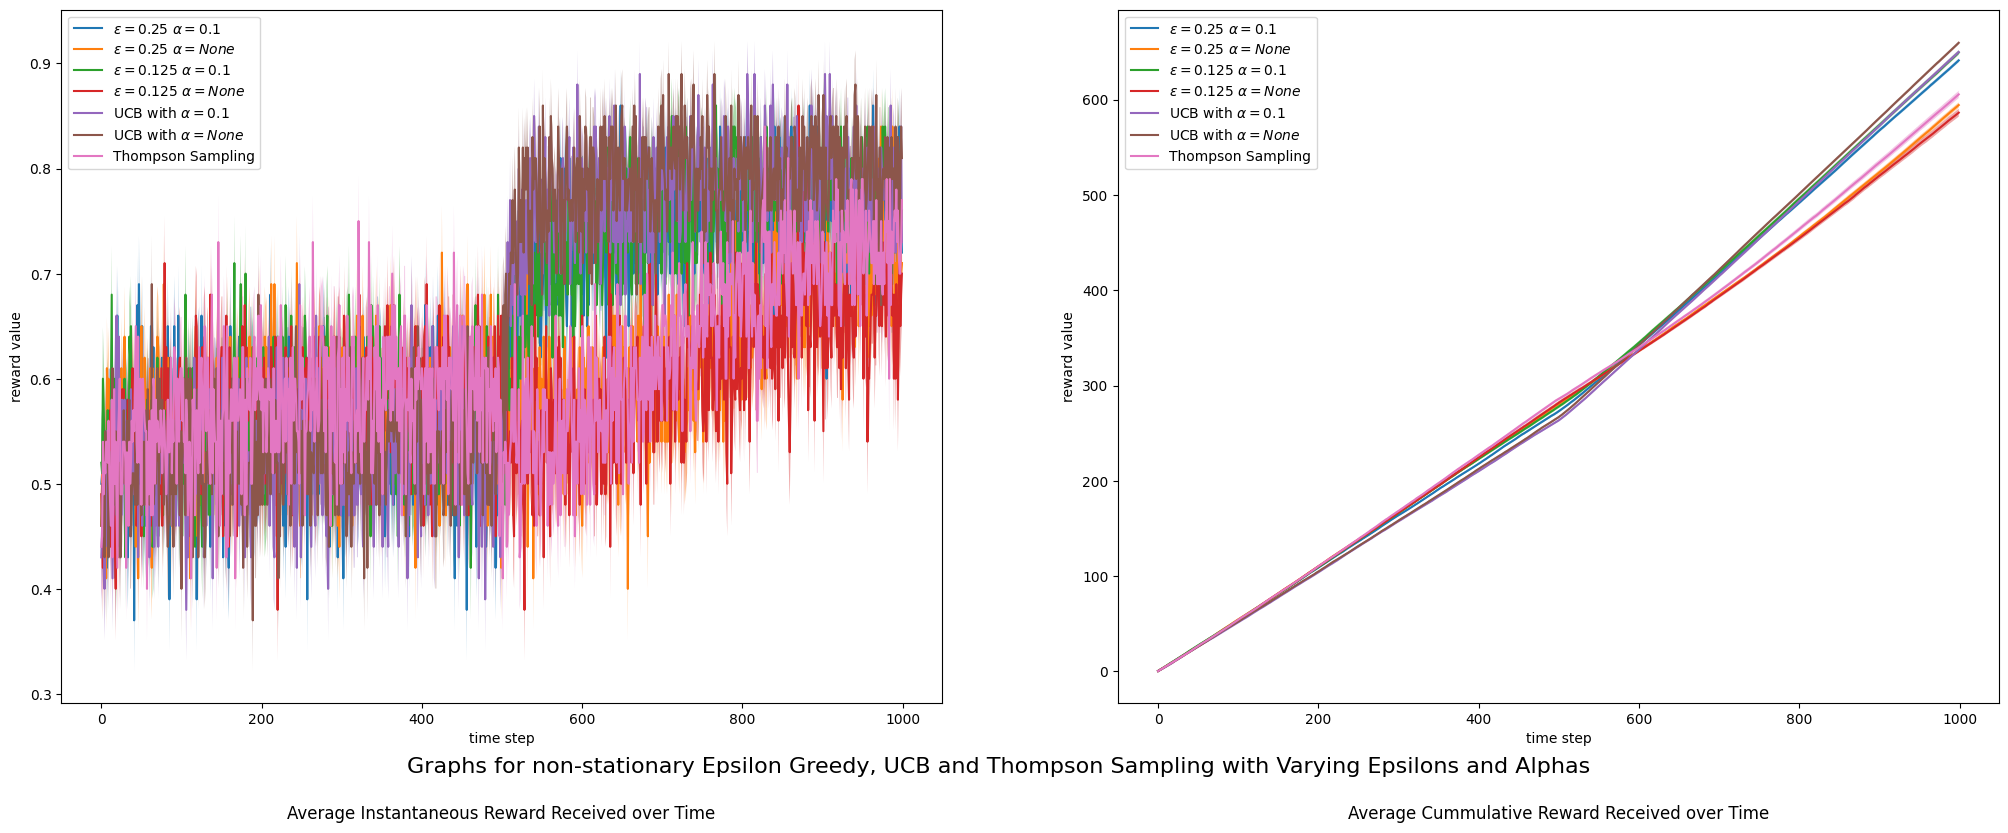

In [20]:

delta = 0.1
num_arms = 3
probs_arr1 = [0.5+delta, 0.5, 0.5-delta]
probs_arr2 = [0.5, 0.5 + 2*delta, 0.5 + 3*delta]
three_arm_bernoulli_bandit_1 = BernoulliBandit(num_arms, probs_arr1)
three_arm_bernoulli_bandit_2 = BernoulliBandit(num_arms, probs_arr2)

epsilons = [1/4, 1/8]
alphas = [0.1, None]
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(25, 9))

for epsilon in epsilons:
      for alph in alphas:

            # arrays of the data generated from 100 runs
            R_over_t_runs = []
            total_R_over_t_runs = []

            for run in range(100):
                  R_over_t, total_R_over_t = epsilon_greedy_non_stationary(three_arm_bernoulli_bandit_1, three_arm_bernoulli_bandit_2, epsilon, alpha=alph)
                  
                  R_over_t_runs.append(R_over_t)
                  total_R_over_t_runs.append(total_R_over_t)

            R_over_t_runs = np.asarray(R_over_t_runs)
            total_R_over_t_runs = np.asarray(total_R_over_t_runs)

            # plot the mean reward over time

            mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
            std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

            axs[0].plot(mean_R_over_t_runs, label = r"$\epsilon = %s$ $\alpha = %s$" %(epsilon, alph))

            R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
            R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
            axs[0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
            # axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

            axs[0].legend()
            axs[0].set_xlabel("time step")
            axs[0].set_ylabel("reward value")
            axs[0].set_title("Average Instantaneous Reward Received over Time", y=-0.18)

            # plot the mean cummulative reward over time

            mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
            std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

            axs[1].plot(mean_total_R_over_t_runs, label = r"$\epsilon = %s$ $\alpha = %s$" %(epsilon, alph))

            total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
            total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
            axs[1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

            axs[1].legend()
            axs[1].set_xlabel("time step")
            axs[1].set_ylabel("reward value")
            axs[1].set_title("Average Cummulative Reward Received over Time", y=-0.18)

for alph in alphas:

      # arrays of the data generated from 100 runs
      R_over_t_runs = []
      total_R_over_t_runs = []

      for run in range(100):
            R_over_t, total_R_over_t = UCB_non_stationary(three_arm_bernoulli_bandit_1, three_arm_bernoulli_bandit_2, alpha=alph)
            R_over_t_runs.append(R_over_t)
            total_R_over_t_runs.append(total_R_over_t)

      R_over_t_runs = np.asarray(R_over_t_runs)
      total_R_over_t_runs = np.asarray(total_R_over_t_runs)

      # plot the mean reward over time

      mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
      std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

      axs[0].plot(mean_R_over_t_runs, label = r"UCB with $\alpha = %s$" %alph)

      R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
      R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
      axs[0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
      # axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

      axs[0].legend()
      axs[0].set_xlabel("time step")
      axs[0].set_ylabel("reward value")
      axs[0].set_title("Average Instantaneous Reward Received over Time", y=-0.18)

      # plot the mean cummulative reward over time

      mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
      std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

      axs[1].plot(mean_total_R_over_t_runs, label = r"UCB with $\alpha = %s$" %alph)

      total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
      total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
      axs[1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

      axs[1].legend()
      axs[1].set_xlabel("time step")
      axs[1].set_ylabel("reward value")
      axs[1].set_title("Average Cummulative Reward Received over Time", y=-0.18)

# arrays of the data generated from 100 runs
R_over_t_runs = []
total_R_over_t_runs = []

for run in range(100):
    R_over_t, total_R_over_t = Thompson_sampling_non_stationary(three_arm_bernoulli_bandit_1,three_arm_bernoulli_bandit_2)
    
    R_over_t_runs.append(R_over_t)
    total_R_over_t_runs.append(total_R_over_t)

R_over_t_runs = np.asarray(R_over_t_runs)
total_R_over_t_runs = np.asarray(total_R_over_t_runs)

# plot the mean reward over time

mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

axs[0].plot(mean_R_over_t_runs, label = r"Thompson Sampling")

R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
axs[0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
# axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

axs[0].legend()
axs[0].set_xlabel("time step")
axs[0].set_ylabel("reward value")
axs[0].set_title("Average Instantaneous Reward Received over Time", y=-0.18)

# plot the mean cummulative reward over time

mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

axs[1].plot(mean_total_R_over_t_runs, label = r"Thompson Sampling")

total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
axs[1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

axs[1].legend()
axs[1].set_xlabel("time step")
axs[1].set_ylabel("reward value")
axs[1].set_title("Average Cummulative Reward Received over Time", y=-0.18)


title = r'Graphs for non-stationary Epsilon Greedy, UCB and Thompson Sampling with Varying Epsilons and Alphas'
fig.suptitle(title, fontsize=16, y=0.05)

plt.show()

### Answers

In the Instantaneous Reward graph, we can see that after the change in action values, the two UCB and two epsilon greedy with alpha = 0.1 performed much better in less time. In the long run, all of the methods reach approximatly the same reward values but the two epsilon greedy with averaging value estimation and Thompson Sampling take longer to get there.

This trend is also seen in the Cummulative Reward graph where we can also distinguish between the two UCB method learning quicker than the two epsilon greedy methods with alpha = 0.1. As with the last graph, Thompson Sampling and the two epsilon greedy with averaging value estimation performed much worse than the other four.

These results makes sense as averaging value estimation is weak to non stationary problems as it puts as much importance on old data compared to new data. UCB is also good for non stationary problems since it explores a lot and constantly which means that any change in the environment is going to be noticed quicker than with other methods. Thus, based on these graphs, UCB is the best algorithm to cope with non-stationarity.